# Nonlinear least squares

In [2]:
using Random
using Statistics
using LinearAlgebra
using ForwardDiff
using Plots

┌ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1278


In [3]:
r(x) = [ ρ[i] - norm(x - b[:,i]) for i=1:m ]
A(x) = ForwardDiff.jacobian(r,x);

In [17]:
Random.seed!(1)
m = 10
b = randn(2,m)            # vector of beacon positions
xt = mean(b,dims=2)[:]          # define true x position as the mean
v = .5*randn(m)           # random error
ρ = [ norm(xt - b[:,i]) + v[i] for i=1:m];

In [5]:
function gn(r, A, x; maxits=20)
    xk = copy(x)
    for i = 1:maxits
        global rk = r(xk)
        Ak = A(xk)
        bk = Ak*xk - rk
        xk = Ak\bk
        println("norm(rk) = $(norm(rk))")
    end
    
    return xk
end;

In [18]:
x0 = rand(2)
x = gn(r, A, x0);

norm(rk) = 3.16069031718313
norm(rk) = 1.997325466855268
norm(rk) = 1.442065057846375
norm(rk) = 1.4012940813339898
norm(rk) = 1.4012181789534286
norm(rk) = 1.4015932926960364
norm(rk) = 1.4018443328210823
norm(rk) = 1.4025338901291953
norm(rk) = 1.402862980810117
norm(rk) = 1.4040813991680703
norm(rk) = 1.4043930140676877
norm(rk) = 1.4064154878401447
norm(rk) = 1.4064409499549828
norm(rk) = 1.4095051863578056
norm(rk) = 1.4087892203866752
norm(rk) = 1.4129479499271629
norm(rk) = 1.4110357568194065
norm(rk) = 1.416108833290246
norm(rk) = 1.4128298312277474
norm(rk) = 1.4185266237102112


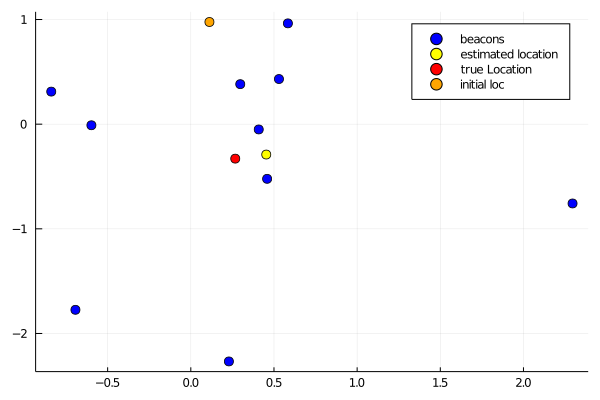

In [19]:
scatter(b[1,:],b[2,:],color="blue", label = "beacons", ms = 5)
scatter!([x[1]],[x[2]],color="yellow", label = "estimated location", ms = 5)
scatter!(xt[[1]],[xt[2]],color="red", label = "true Location", ms = 5)
scatter!(x0[[1]],[x0[2]],color="orange", label = "initial loc", ms = 5)


## Damped Gauss Newton

In [8]:
function dgn(r, A, x, α; maxits=20)
    xk = copy(x)
    for i = 1:maxits
        global rk = r(xk)
        Ak = A(xk)
        zk = Ak\rk
        xk = xk-α*zk
    end
    println("norm(rk) = $(norm(rk))")
    return xk
end;

In [9]:
dx = dgn(r, A, x0, 1);

norm(rk) = 1.4185266237102112


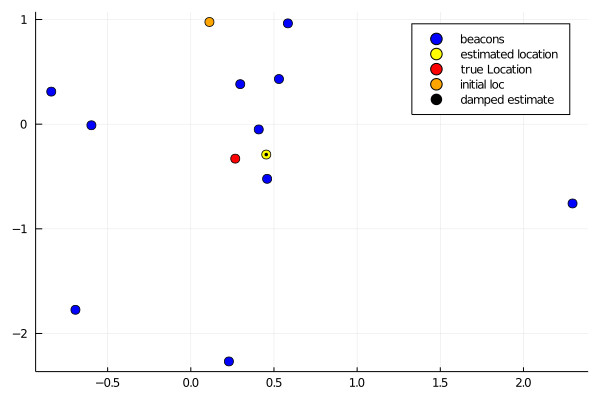

In [10]:
scatter(b[1,:],b[2,:],color="blue", label = "beacons", ms = 5)
scatter!([x[1]],[x[2]],color="yellow", label = "estimated location", ms = 5)
scatter!(xt[[1]],[xt[2]],color="red", label = "true Location", ms = 5)
scatter!(x0[[1]],[x0[2]],color="orange", label = "initial loc", ms = 5)
scatter!(dx[[1]],[dx[2]],color="black", label = "damped estimate", ms = 2)
